In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
data=pd.read_csv('C:/Users/mihye/Desktop/대학교/고려대/3-1/etc/archive (2)/Final dataset Attrition.csv')

In [9]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

# 결측치 제거

In [11]:
data=data.drop(['Date_of_termination'],axis=1)
data=data.drop(['Unnamed: 32'],axis=1)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Gender                   1470 non-null   object
 6   JobInvolvement           1470 non-null   int64 
 7   JobLevel                 1470 non-null   int64 
 8   JobRole                  1470 non-null   object
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  NumCompaniesWorked       1470 non-null   int64 
 13  OverTime                 1470 non-null   object
 14  PercentSalaryHike        1470 non-null  

# 이상치 탐색

In [24]:
selected_columns = data.select_dtypes(include=['int64', 'float64'])

In [25]:
selected_columns

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism
0,37,2,2,1,3,2090,6,15,3,0,7,3,0,0,0,4,2
1,21,15,3,1,4,1232,1,14,3,0,0,6,0,0,0,5,2
2,45,6,3,3,1,13245,4,14,3,0,17,3,0,0,0,1,3
3,23,2,3,1,1,2322,3,13,3,1,3,3,0,0,0,1,0
4,22,15,3,1,4,2871,1,15,3,0,1,5,0,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,3,2,4,1,16856,1,11,3,0,34,3,34,1,16,3,2
1466,55,1,3,5,1,19045,0,14,3,0,37,2,36,4,13,1,1
1467,55,26,2,5,4,19586,1,21,4,1,36,3,36,2,13,2,1
1468,58,10,3,4,3,13872,0,13,3,0,38,1,37,1,8,2,2


In [30]:
def box_plot(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.boxplot(df[df.columns[i]])
        ax.set_title(df.columns[i])
    plt.show()

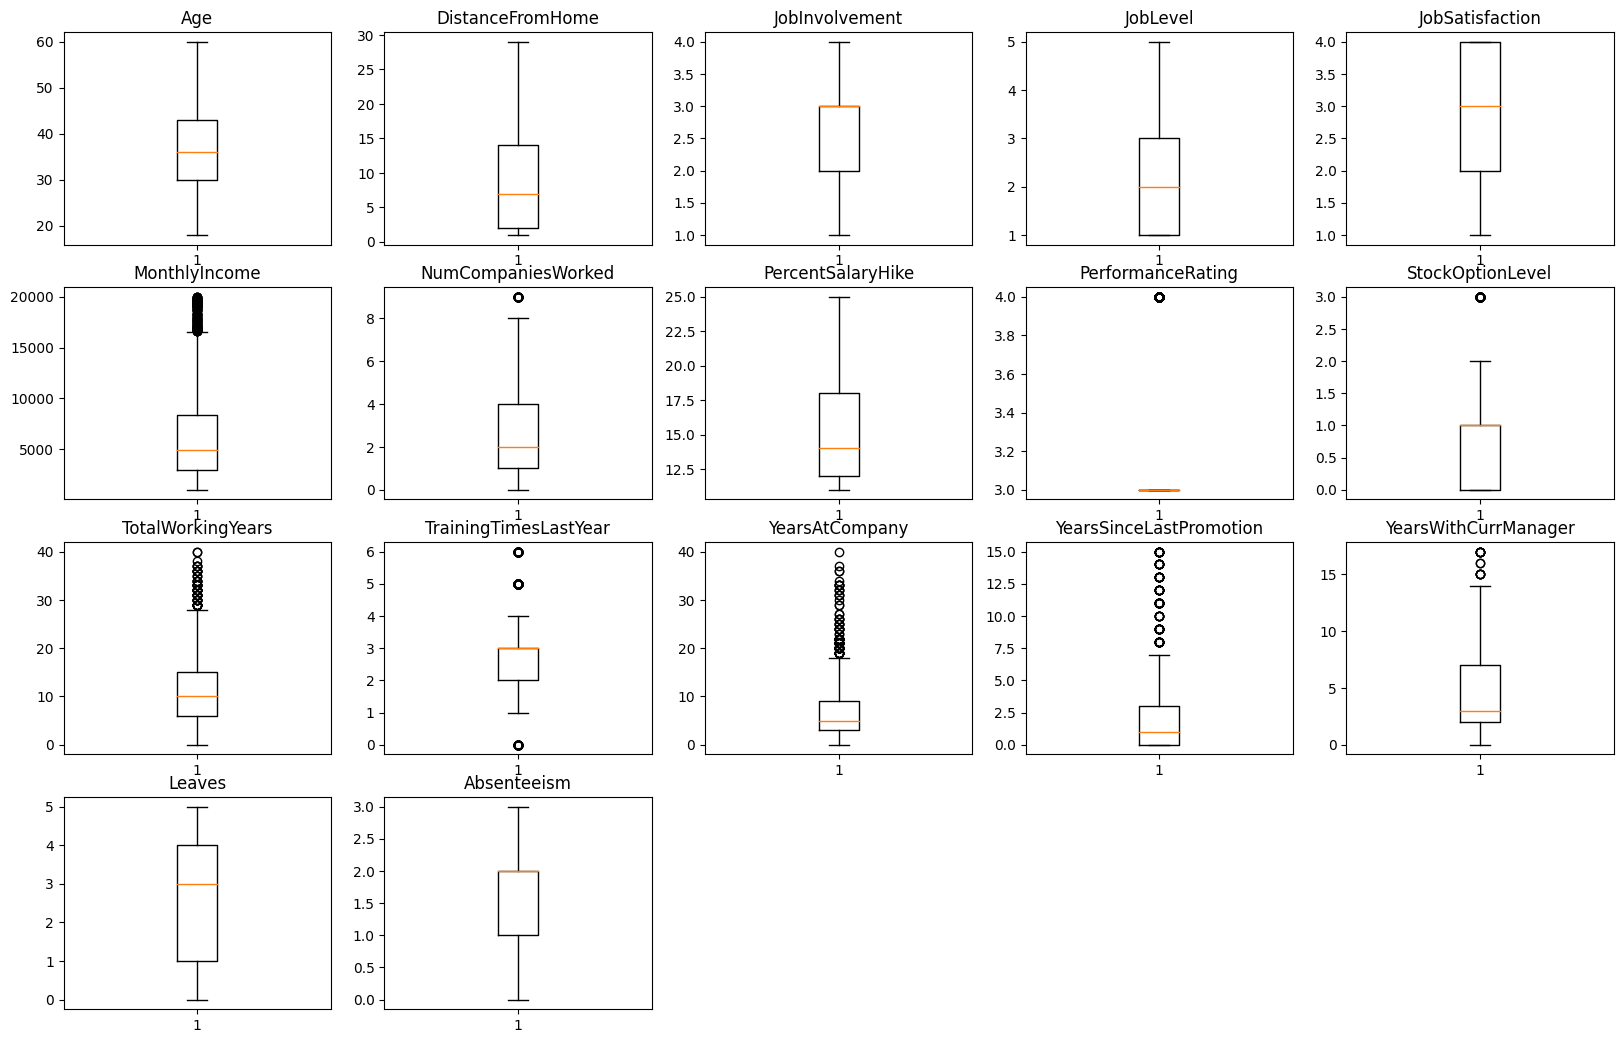

In [31]:
box_plot(selected_columns)

# 상관관계 파악 및 시각화

In [116]:
columns_list = data.columns.tolist()
print(columns_list)

['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education', 'Date_of_Hire', 'Status_of_leaving', 'Mode_of_work', 'Leaves', 'Absenteeism', 'Work_accident', 'Source_of_Hire', 'Job_mode', 'new', 'IncomeLevel', 'AgeLevel']


In [117]:
column_nominal=['Attrition','BusinessTravel','Department','Gender','JobRole','MaritalStatus']
column_ordinal=['JobInvolvement','JobLevel']
column_numerical=['Age','DistanceFromHome','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike']

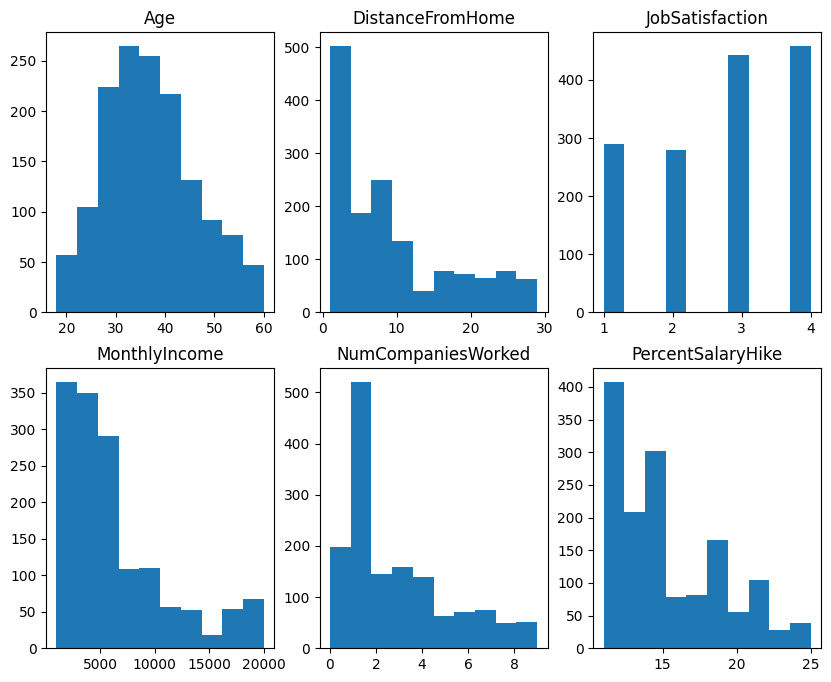

In [137]:
plt.figure(figsize=(10,8))
for i in range(len(column_numerical)):
    plt.subplot(2,3,i+1)
    plt.title(column_numerical[i])
    plt.hist(data[column_numerical[i]])
plt.show()

In [37]:
corr_data=data[column_numerical]
corr_data.head()

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike
0,37,2,3,2090,6,15
1,21,15,4,1232,1,14
2,45,6,1,13245,4,14
3,23,2,1,2322,3,13
4,22,15,4,2871,1,15


In [32]:
corr_data.corr()

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike
Age,1.000000,-0.001686,-0.004892,0.497855,0.299635,0.003634
DistanceFromHome,-0.001686,1.000000,-0.003669,-0.017014,-0.029251,0.040235
JobSatisfaction,-0.004892,-0.003669,1.000000,-0.007157,-0.055699,0.020002
MonthlyIncome,0.497855,-0.017014,-0.007157,1.000000,0.149515,-0.027269
NumCompaniesWorked,0.299635,-0.029251,-0.055699,0.149515,1.000000,-0.010238
PercentSalaryHike,0.003634,0.040235,0.020002,-0.027269,-0.010238,1.000000


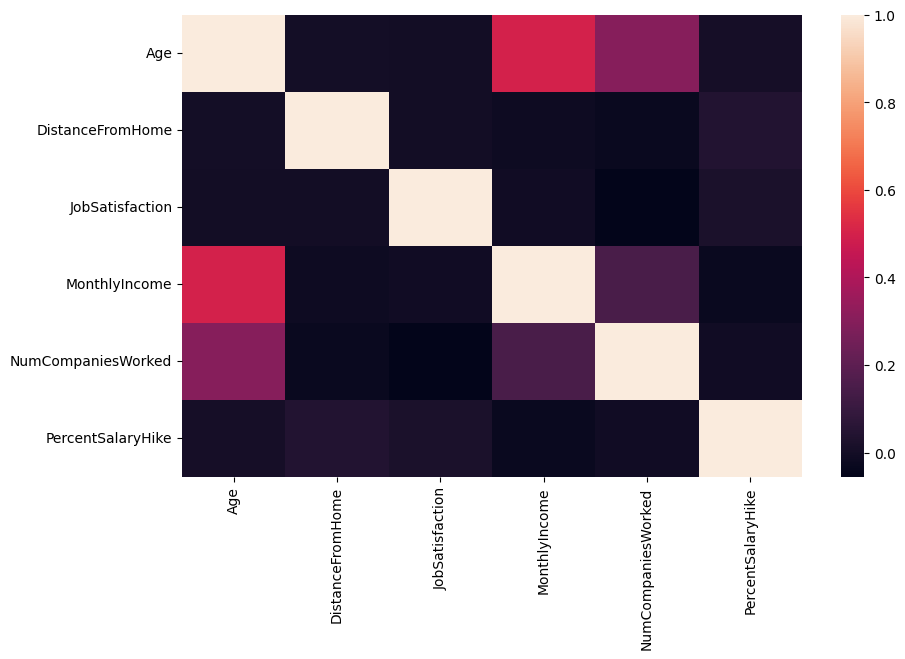

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_data.corr())
plt.show()

# 파생변수 생성

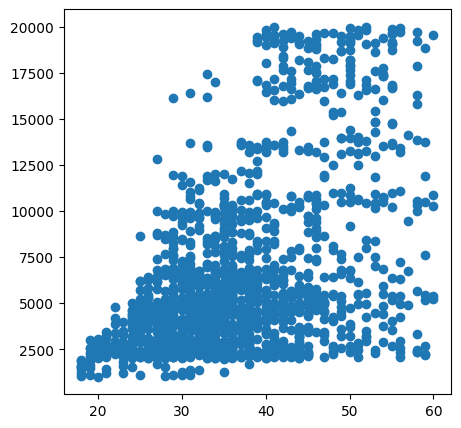

In [120]:
plt.figure(figsize=(5,5))
plt.scatter(data['Age'],data['MonthlyIncome'])
plt.show()

In [114]:
data['IncomeLevel'] = np.where(data['MonthlyIncome']>5000, 'high', 'low')
data['AgeLevel'] = np.where(data['Age']>=35, 'high', 'low')
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,new,IncomeLevel,AgeLevel
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,Salary,OFFICE,4,2,No,Job Event,Contract,0,low,high
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,Work Accident,WFH,5,2,No,Recruiter,Part Time,0,low,low
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,Dept.Head,WFH,1,3,No,Job Event,Contract,0,high,high
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,0,low,low
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,Better Opportunity,WFH,5,2,No,Job Event,Contract,0,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,...,Salary,OFFICE,3,2,No,Job Portal,Part Time,0,high,high
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,...,Work Accident,WFH,1,1,No,Walk-in,FullTime,0,high,high
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,...,Work Accident,OFFICE,2,1,No,Recruiter,Part Time,0,high,high
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,...,Work Environment,WFH,2,2,Yes,Job Event,Part Time,0,high,high


<Axes: xlabel='AgeLevel', ylabel='count'>

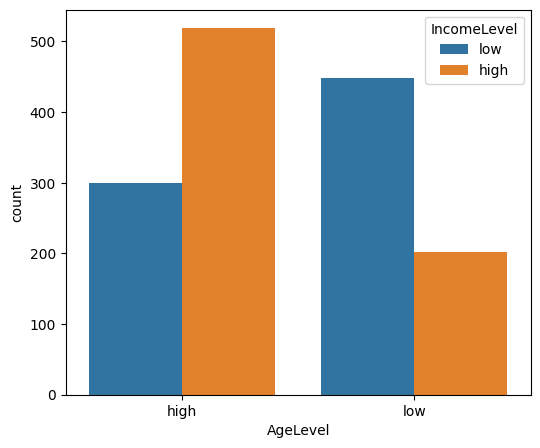

In [115]:
plt.figure(figsize=(6,5))
sns.countplot(data, x="AgeLevel", hue = 'IncomeLevel')

# library와 framework

library

라이브러리는 사용자가 필요에 의해 호출하여 사용하는 도구로, 함수, 클래스, 모듈 등으로 구성되어 있다.

framework

프레임워크는 사용자에게 구조와 규칙을 제공하는 기반으로, 모듈, 라이브러리 등을 포함하고 있다. 코드를 짤 때 프레임워크 상에서 코드를 짜게 된다.

# DL과 ML

DL

딥러닝은 머신러닝보다 좁은 개념으로, 대표적으로 tensorflow와 pythorch를 이용한다. 주로 방대한 양의 데이터를 다룰 때 사용하게 되며, 레이어를 여러 번 쌓아 머신러닝보다 깊게 학습한다.

ML

머신러닝은 딥러닝을 포함하는 개념으로, 대표적으로 sklearn을 이용한다. 데이터의 양이 많지 않을 때 사용할 수 있으며, 따라서 딥러닝에 비해 보다 가벼운 학습을 진행한다.

머신러닝은 지도학습, 비지도학습, 강화학습으로 이루어져 있으며 지도학습은 지정된 결과값이 존재하는 경우, 비지도학습은 정해지지 않은 경우, 강화학습은 리워드가 주어진 경우를 의미한다. 또한 이들은 classification과 regression의 종류로도 구분될 수 있다.